In [92]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.utils import Sequence
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from keras.layers import BatchNormalization


import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



input/dataset.csv
input/data1.csv
input/datasets/datasets/Notes/Half/h467.jpg
input/datasets/datasets/Notes/Half/h627.jpg
input/datasets/datasets/Notes/Half/h520.jpg
input/datasets/datasets/Notes/Half/h103.jpg
input/datasets/datasets/Notes/Half/h642.jpg
input/datasets/datasets/Notes/Half/h559.jpg
input/datasets/datasets/Notes/Half/h83.jpg
input/datasets/datasets/Notes/Half/h116.jpg
input/datasets/datasets/Notes/Half/h821.jpg
input/datasets/datasets/Notes/Half/h266.jpg
input/datasets/datasets/Notes/Half/h331.jpg
input/datasets/datasets/Notes/Half/h664.jpg
input/datasets/datasets/Notes/Half/h546.jpg
input/datasets/datasets/Notes/Half/h8.jpg
input/datasets/datasets/Notes/Half/h813.jpg
input/datasets/datasets/Notes/Half/h484.jpg
input/datasets/datasets/Notes/Half/h692.jpg
input/datasets/datasets/Notes/Half/h465.jpg
input/datasets/datasets/Notes/Half/h426.jpg
input/datasets/datasets/Notes/Half/h620.jpg
input/datasets/datasets/Notes/Half/h138.jpg
input/datasets/datasets/Notes/Half/h964.jpg
i

In [93]:
label_code = {'Eight':0,'Half':1,'Quarter':2,'Sixteenth':3,'Whole':4}
label_decode = ['Eight','Half','Quarter','Sixteenth','Whole']
df = pd.DataFrame(columns = ['path', 'label'])

for dirname, _, filenames in os.walk('input/datasets/datasets/Notes'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        name = dirname.split('/')[-1]
        label = label_code[name]
        df = pd.concat([df, pd.DataFrame([{'path' : path, 'label' : label}])], ignore_index=True)


df.head()


,path,label
0,input/datasets/datasets/Notes/Half/h467.jpg,1
1,input/datasets/datasets/Notes/Half/h627.jpg,1
2,input/datasets/datasets/Notes/Half/h520.jpg,1
3,input/datasets/datasets/Notes/Half/h103.jpg,1
4,input/datasets/datasets/Notes/Half/h642.jpg,1


In [94]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state = 77)
img_width, img_height = 224, 224
batch_size = 32

def load_images(dataframe):
    images = []
    labels = []
    for index, row in dataframe.iterrows():
        img_path = row['path']
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

X_train, y_train = load_images(train_df)
X_test, y_test = load_images(test_df)

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)


Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))
rf_pred = rf_model.predict(X_test.reshape(X_test.shape[0], -1))
rf_accuracy = accuracy_score(np.argmax(y_test, axis=1), rf_pred)
rf_accuracy

0.965

Многослойный парацептрон

In [96]:

mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=224)
mlp_model.fit(X_train.reshape(X_train.shape[0], -1), np.argmax(y_train, axis=1))
mlp_pred = mlp_model.predict(X_test.reshape(X_test.shape[0], -1))
mlp_accuracy = accuracy_score(np.argmax(y_test, axis=1), mlp_pred)
mlp_accuracy

0.792

Сверточная модель(на исходных данных)

In [107]:
from keras.src.layers import Dropout

cnn = Sequential()
cnn.add(Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn.add(Conv2D(4, (4, 4), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(4, (3, 3), activation='relu'))
cnn.add(Conv2D(4, (3, 3), activation='relu'))
cnn.add(Conv2D(3, (3, 3), activation='relu'))
cnn.add(Conv2D(3, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(5,activation='softmax'))

In [108]:
cnn.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 conv2d_73 (Conv2D)          (None, 219, 219, 4)       516       
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 109, 109, 4)       0         
 ng2D)                                                           
                                                                 
 conv2d_74 (Conv2D)          (None, 107, 107, 4)       148       
                                                                 
 conv2d_75 (Conv2D)          (None, 105, 105, 4)       148       
                                                                 
 conv2d_76 (Conv2D)          (None, 103, 103, 3)       111       
                                                     

In [109]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [110]:
cnn.fit(X_train, y_train, epochs=10)
score = cnn.evaluate(X_test, y_test)[1]
score

Epoch 1/10
125/125 [==============================] - 40s 311ms/step - loss: 1.1041 - accuracy: 0.5205
Epoch 2/10
125/125 [==============================] - 39s 308ms/step - loss: 0.2907 - accuracy: 0.8975
Epoch 3/10
125/125 [==============================] - 39s 308ms/step - loss: 0.1178 - accuracy: 0.9643
Epoch 4/10
125/125 [==============================] - 39s 309ms/step - loss: 0.0535 - accuracy: 0.9837
Epoch 5/10
125/125 [==============================] - 39s 310ms/step - loss: 0.0223 - accuracy: 0.9933
Epoch 6/10
125/125 [==============================] - 39s 310ms/step - loss: 0.0249 - accuracy: 0.9935
Epoch 7/10
125/125 [==============================] - 39s 310ms/step - loss: 0.0257 - accuracy: 0.9937
Epoch 8/10
125/125 [==============================] - 39s 311ms/step - loss: 0.0053 - accuracy: 0.9995
Epoch 9/10
125/125 [==============================] - 39s 310ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/10
25/25 [==============================] - 1s 31ms/step - loss:

0.9549999833106995

Ошибочные данные

25/25 [==============================] - 1s 31ms/step


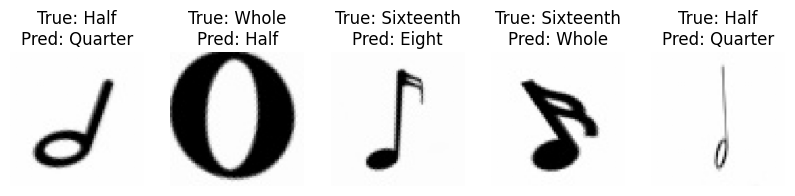

In [111]:

predictions = cnn.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1)

true_classes = np.argmax(y_test, axis=1)

misclassified_indices = np.where(predicted_classes != true_classes)[0]

plt.figure(figsize=(10, 4))
for i, index in enumerate(misclassified_indices[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[index])
    plt.title(f"True: {label_decode[true_classes[index]]}\nPred: {label_decode[predicted_classes[index]]}")
    plt.axis('off')

plt.show()

Сверточная модель(на расширенных данных)

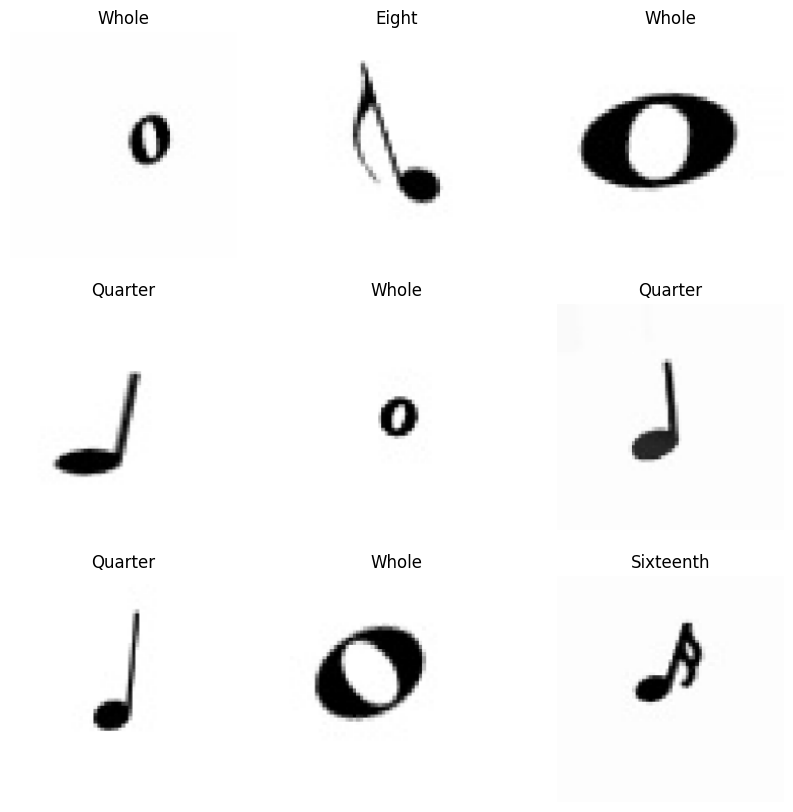

In [123]:
from keras.src.utils import array_to_img, img_to_array, load_img
from keras.src.preprocessing.image import ImageDataGenerator


def load_images1(dataframe):
    images = []
    labels = []
    for index, row in dataframe.iterrows():
        img_path = row['path']
        img = load_img(img_path, target_size=(img_width, img_height))
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(row['label'])
    return np.array(images), np.array(labels)



test_df, val_df = train_test_split(test_df, test_size=0.2, random_state = 77)


X_val, y_val = load_images1(val_df)
X_test, y_test = load_images1(test_df)

X_val = X_val / 255.0
X_test = X_test / 255.0

y_val = to_categorical(y_val, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)


datagen = ImageDataGenerator(
    rescale=1./255,
    # shear_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

train_generator = datagen.flow(X_train, y_train, batch_size=10)
test_generator = ImageDataGenerator()
validation_generator = test_generator.flow(X_val, y_val)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    batch = train_generator.next()
    images, labels = batch
    image = batch[0][0]
    plt.imshow(array_to_img(images[0]))
    label_index = np.argmax(labels[0])
    plt.title(label_decode[label_index])
    
    plt.axis('off')

plt.show()

In [124]:


cnn1 = Sequential()
cnn1.add(Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)))
cnn1.add(Conv2D(4, (4, 4), activation='relu'))
cnn1.add(MaxPooling2D((2, 2)))
cnn1.add(Conv2D(4, (3, 3), activation='relu'))
cnn1.add(Conv2D(4, (3, 3), activation='relu'))
cnn1.add(Conv2D(3, (3, 3), activation='relu'))
cnn1.add(Conv2D(3, (3, 3), activation='relu'))
cnn1.add(MaxPooling2D((2, 2)))
cnn1.add(Flatten())
cnn1.add(Dense(32, activation='relu'))
cnn1.add(Dense(5,activation='softmax'))

cnn1.summary()

cnn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = cnn1.fit(train_generator, epochs=10, validation_data=validation_generator)



Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 conv2d_85 (Conv2D)          (None, 219, 219, 4)       516       
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 109, 109, 4)       0         
 ng2D)                                                           
                                                                 
 conv2d_86 (Conv2D)          (None, 107, 107, 4)       148       
                                                                 
 conv2d_87 (Conv2D)          (None, 105, 105, 4)       148       
                                                                 
 conv2d_88 (Conv2D)          (None, 103, 103, 3)       111       
                                                     

In [125]:
accuracy = cnn1.evaluate(test_generator.flow(X_test, y_test))[1]
accuracy


3/3 [==============================] - 0s 23ms/step - loss: 1.6086 - accuracy: 0.2537


0.2537313401699066